# 심층 신경망
- 인공 신경망에 층을 추가하여 심층 신경망을 만들어 성능 향상 가능

In [1]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다. 
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

C:\Users\LG\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 2개의 층
- 기존의 인공 신경망 모델에 층을 2개 추가
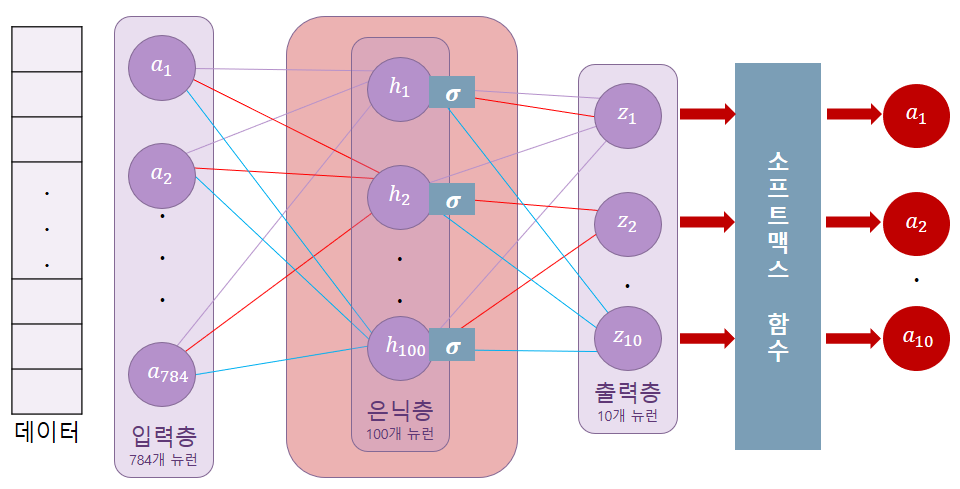
- 입력층과 출력층 사이에 밀집층이 추가되고 이를 은닉층이라 함
- 은닉층은 1개~수십만개 등 여러 개를 추가할 수 있음
- 은닉층에는 각 노드에 활성화함수가 포함됨(신경망 층의 선형 방정식의 결과에 적용되는 함수)

## 활성화 함수(Activated Function)
- 은닉층과 출력층에서 계산된 선형 방정식의 결과를 이용하여 활성화 함수를 동작
- 출력층에 사용되는 활성화 함수는 소프트맥스(다중 분류)와 시그모이드(이진 분류)
- 은닉층에 사용되는 활성화 함수는 출력층에 비해 적용할 수 있는 함수가 자유로움(대체로 sigmoid, ReLU 사용)
- 만약 회귀를 위한 신경망인 경우 활성화 함수 지정 안함(층마다 선형 방정식의 결과를 그대로 사용)

#### 데이터 준비

In [20]:
from tensorflow import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

#### 데이터 나누기

In [21]:
from sklearn.model_selection import train_test_split

X_train_scaled = X_train / 255.0
X_train_scaled = X_train_scaled.reshape(-1, 28*28)

X_train_scaled, X_val_scaled, y_train, y_test = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42)

#### 입력 형태 정의

In [22]:
input_layer = keras.Input(shape=(784,))  # Input 객체를 사용하여 입력 형태를 명확하게 정의

#### 신경망에 추가할 층 생성하기
- 신경망의 첫 번째 은닉층은 입력의 크기 지정 필수
- 뉴런의 개수 지정에는 특별한 기준이 없음(단, 출력층의 뉴런보다는 많아야 함)

In [23]:
dense1 = keras.layers.Dense(100, activation='sigmoid')
dense2 = keras.layers.Dense(10, activation='softmax')

##### 설명
- dense1은 입력층과 연결된 첫 번째 은닉층(입력 데이터의 크기 지정 필수)
    - 뉴런 개수는 100개, 활성화 함수는 시그모이드, 입력 데이터 크기 784개의 행으로 이루어진 데이터)
- dense2는 출력층이므로 10개의 뉴런으로 10가지 클래스의 분류 결과를 나타냄
    - 뉴런 개수는 10개, 활성화 함수는 소프트맥스

# 심층신경망 만들기
- dense1과 dense2객체를 Sequential클래스에 추가하여 심층 신경망(Deep Neural Network) 생성
- Sequential객체 생성 시 층 여러개를 추가하려는 경우 리스트로 전달
- 출력층을 가장 마지막에 두는 것 중요(입력층->은닉층->출력층 순서대로 리스트 생성)
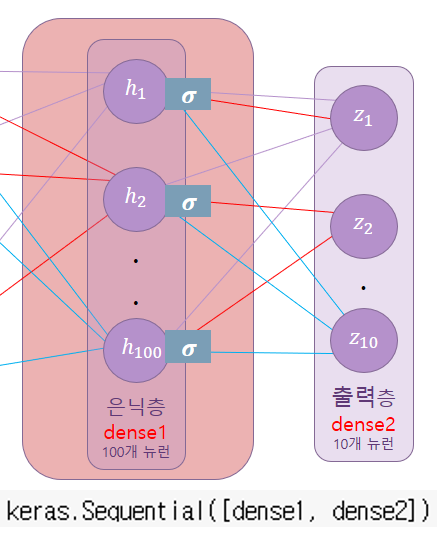

In [24]:
model = keras.Sequential()

model.add(input_layer)
model.add(keras.layers.Dense(100, activation='sigmoid'))
model.add(keras.layers.Dense(10, activation='softmax'))

#### 층에 대한 정보 확인
- summary()를 이용하면 층에 대한 의미있는 정보를 얻을 수 있음

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

##### 설명
- 첫 줄은 모델의 이름
- 레이어에는 모델에 추가된 층이 순서대로 나열됨
- 각 층마다 가지는 이름, 클래스, 출력 크기, 모델 파라미터 개수가 출력됨
- 층 생성 시 name지정 가능(default: dense)
- 출력의 크기는 (None, 100)일 때 첫 번째 차원은 샘플의 개수를 의미(배치 차원)
    - 케라스 모델에 fit() 호출 시 훈련 데이터를 주입하면 미니배치 경사하강법 적용됨
    - 기본 미니배치 크기는 32이고 batch_size로 조절 가능
    - 샘플 개수를 고정하지 않고 유연하게 다양한 배치 크기에 대응하기 위해 None으로 지정
- 두 번째 100은 은닉층의 뉴런 개수를 100개로 지정했으므로 100개의 출력이 나옴(748개의 픽셀이 은닉층을 통해 100개로 압축)
- Param은 모델 파라미터의 개수
    - 첫 번째 은닉층: 입력층 노드 수(784) x 은닉층(dense) 노드 수(100) + dense 절편 수(100)
    - 두 번째 은닉층: 첫 번째 은닉층(dense) 출력 개수(100) x 두 번째 은닉층(dense_1) 노드 수(10) + 출력층 절편 수(10)
- 마지막 전체 모델 파라미터 개수
    - Non_trainable params: 가끔 경사하강법으로 훈련되지 않는 파라미터를 가진 층의 모델 파라미터 개수 표시됨

In [9]:
# dense층의 모델 파라미터 개수
dense = 784 * 100 + 100
dense

78500

In [10]:
# dense_1층의 모델 파라미터 개수
dense_1 = 100 * 10 + 10
dense_1

1010

In [11]:
dense + dense_1

79510

# 층을 추가하는 또 다른 방법
- 생성자 안에 바로 정의하는 방법
- add()메서드로 추가하는 방법

In [12]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델')

C:\Users\LG\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "패션 MNIST 모델"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden (Dense)                       │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

#### 권장되는 방식

In [14]:
model = keras.Sequential()

model.add(keras.layers.Input(shape=(784,)))
model.add(keras.layers.Dense(100, activation='sigmoid'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 988us/step - accuracy: 0.7531 - loss: 0.7680
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 899us/step - accuracy: 0.8474 - loss: 0.4250
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step - accuracy: 0.8600 - loss: 0.3846
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - accuracy: 0.8696 - loss: 0.3596
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step - accuracy: 0.8761 - loss: 0.3408


##### 신경망에 은닉층을 추가한 결과
- 층을 추가하여 성능이 향상되었음(이전 신경망 모델의 점수: 0.8516666889190674)
- 여러 층을 더 추가하더라도 방법은 compile(), fit() 사용법은 동일

In [112]:
model = keras.Sequential()
model.add(keras.layers.Dense(200, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(100, activation='sigmoid'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=5)

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                     │ (None, 200)                 │         157,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,110 (695.74 KB)

 Trainable params: 178,110 (695.74 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7102 - loss: 0.8824
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8432 - loss: 0.4293
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8601 - loss: 0.3839
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8697 - loss: 0.3552
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8780 - loss: 0.3339


# 렐루(ReLU) 활성화 함수
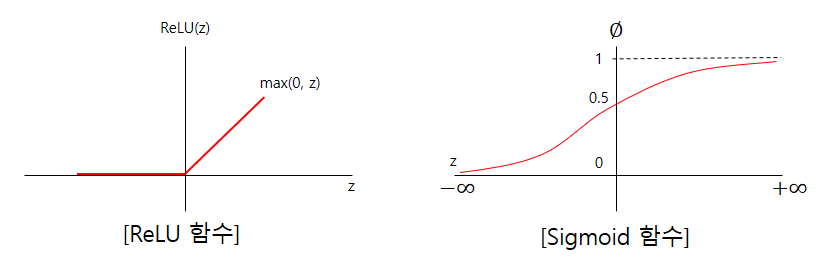
### 시그모이드(Sigmoid) 함수
    - 초창기 인공 신경망의 은닉층에 많이 사용된 활성화 함수
    - 시그모이드 함수는 오른쪽과 왼쪽 끝으로 갈수록 그래프가 0, 1에 인접하게 길어짐
    - 올바른 출력을 만드는데에 신속하게 대응하지 못함(층이 많아질수록 학습을 더 어렵게 만듦)
### 렐루(ReLU) 함수
    - 입력이 양수일 경우 활성화 함수가 없는 것처럼 입력을 그냥 통과시킴
    - 음수일 경우는 그냥 0으로 만듦
    - max(0, z)와 같은 함수로 생각할 수 있음(z가 0보다 크면 z, 0보다 작으면 0을 반환하는 함수)
    - 이미지 처리에서 성능이 좋다고 알려져 있음
    
### Flatten 층
- 크기가 28x28인 이미지 데이터를 신경망에 주입하기 위해 reshape()를 사용하여 단순히 1차원으로 변형함
- 케라스는 이러한 기능을 Flatten이라는 하나의 층으로 제공함
- Flatten 클래스는 배치 차원을 제외하고 나머지 모든 입력 차원을 모두 일렬로 펼치는 역할(가중치와 절편 없음)
- 입력층과 출력층 사이에 Flatten층을 추가하기 때문에 층(layer)이라 지칭함(신경망의 깊이에는 포함하지 않음)

In [113]:
# 입력층 바로 뒤에 Flatten층 추가
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# Input객체를 전달하는 방식으로 생성(권장)
# model.add(Input(shape=(28, 28)))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(100, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax'))

C:\Users\KKAKKA\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [114]:
model.summary()

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

##### 해석
- Flatten 객체에 포함된 모델 파라미터 개수는 0개
- 입력값의 차원 짐작 가능(None, 784)
- 입력 데이터에 대한 전처리 과정을 가능한 모델에 포함시키는 것이 케라스 API의 철학

#### 데이터 준비 및 신경망 모델 훈련하기
- reshape대신 Flatten이 적용된 신경망 모델임

In [115]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

X_train_scaled = X_train / 255.0

X_train_scaled, X_val_scaled, y_train, y_val_test = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42)

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7646 - loss: 0.6831
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8512 - loss: 0.4089
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8670 - loss: 0.3629
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8780 - loss: 0.3368
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8848 - loss: 0.3188


##### 훈련 세트 성능 결과
- 렐루함수를 적용했을 때 시그모이드에 비해 약간 성능이 향상됨

#### 검증 세트 성능 확인

In [116]:
model.evaluate(X_val_scaled, y_val_test)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8683 - loss: 0.3935


[0.3953573405742645, 0.8660833239555359]

##### 결과
- 은닉층을 추가하지 않았을 때보다 성능이 높아짐
- 모델의 에포크를 5번 이상 진행하면?

# Optimizer(최적화)
## 신경망 모델의 성능을 높이는 방법
- 은닉층을 여러 개 추가하는 것
- 하이퍼 파라미터 조정

## 신경망의 하이퍼 파라미터
- 추가하는 은닉층의 개수
- 은닉층의 뉴런 개수
- 은닉층의 종류 
- 미니배치 사이즈(디폴트 32개)
- 에포크 수
- 경사하강법 알고리즘
- 기타 등등

#### SGD옵티마이저
- 가장 기본적인 경사하강법으로 미니배치를 사용
- tensorflow.keras.optimizers.SGD 클래스로 정의 되어 있음

In [117]:
# SGD 적용하기 1 - 별칭으로 지정
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [118]:
# SGD 적용하기 2 - SGD()객체를 별도로 생성하여 지정
model = keras.Sequential()

sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.add(Input(shape=(28, 28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6582 - loss: 1.0992
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8121 - loss: 0.5599
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8291 - loss: 0.4991
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8405 - loss: 0.4687
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8473 - loss: 0.4485


In [119]:
model.evaluate(X_val_scaled, y_val_test)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 996us/step - accuracy: 0.8449 - loss: 0.4400


[0.44629907608032227, 0.8418333530426025]

In [120]:
# SGD 클래스의 학습률 조정(디폴트 0.01)하는 최적화 객체 생성
model = keras.Sequential()
sgd = keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.add(keras.layers.Input(shape=(28, 28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7471 - loss: 0.7206
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8432 - loss: 0.4304
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8619 - loss: 0.3820
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8709 - loss: 0.3540
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8773 - loss: 0.3339


#### 많이 사용되는 옵티마이저
- 기본 경사 하강법 옵티마이저(SGD클래스에서 제공됨)
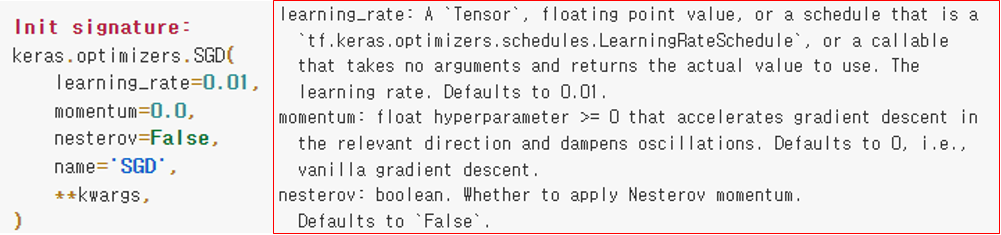
    - learning_rate : 학습률
    - momentum : 0 보다 큰 값을 지정하면 이전의 그레이디언트를 가속도처럼 사용하는 모멘텀 최적화를 사용(보통 0.9이상을 지정)
    - nesterov : True로 변경하면 네스테로프(nesterov) 모멘텀 최적화(네스테로프(nesterov) 가속 경사)를 사용
        - 네스테로프(nesterov) 모멘텀 최적화
            - 모멘텀 최적화를 2번 반복하여 구현
            - 대부분 네스테로프 모멘텀 최적화가 기본적인 경사 하강법 보다 더 나은 성능 제공
- 적응적 학습률(adaptive learning rate) 옵티마이저
    - 적응적 학습률이란
        - 모델이 최적점에 가까워질수록 학습률을 낮출 수 있음(안정적으로 최적점에 수렴할 가능성이 높아짐)
    - 종류
        - Adagrad(Adaptive Gradient)
            - gradient descent 알고리즘을 사용하면 방향 별로 learning rate가 동일
            - 빠른 방향으로는 더 빠르게 가고 느린 곳은 더 느리게 가므로 학습 불균형이 생김
            - 방향 별로 learning rate를 다르게 가져가도록 하는 방식
        - RMSprop(Root Mean Square Propergation)
            - Adagrad를 조금 수정한 개념
            - 이전 그레이디언트를 보고 업데이트 시 모든 축마다 공평하게 update하는 방식
            - compile() 호출 시 optimazer='rmsprop' 설정이 기본(default) 설정값
        - Adam(모멘텀 최적화와 RMSprop의 장점을 접목한 것)
        - Adam과 RMSProp은 옵티마이저를 처음 시도할 때 좋은 알고리즘
        - 위 3가지의 클래스 모두 learning_rate의 디폴트값으로 0.001을 사용

In [121]:
# 예시) 네스테로프(nesterov) 모멘텀 최적화(네스테로프(nesterov) 가속 경사)를 사용하는 최적화 객체 생성
model = keras.Sequential()

sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.add(keras.layers.Input(shape=(28, 28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7595 - loss: 0.6934
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8503 - loss: 0.4204
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8644 - loss: 0.3768
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8734 - loss: 0.3509
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8791 - loss: 0.3316


In [122]:
model.evaluate(X_val_scaled, y_val_test)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8624 - loss: 0.3750


[0.3783404231071472, 0.8605833053588867]

In [123]:
# 예시) Adagrad 옵티마이저 생성 및 모델에 적용
model = keras.Sequential()

adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.add(keras.layers.Input(shape=(28, 28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5400 - loss: 1.5225
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7404 - loss: 0.8161
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7689 - loss: 0.7112
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7842 - loss: 0.6604
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7950 - loss: 0.6281


In [124]:
model.evaluate(X_val_scaled, y_val_test)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7936 - loss: 0.6201


[0.624646782875061, 0.7945833206176758]

In [125]:
# 예시) RMSprop 옵티마이저 생성 및 모델에 적용
model = keras.Sequential()

rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.add(keras.layers.Input(shape=(28, 28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7631 - loss: 0.6835
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8550 - loss: 0.4066
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8695 - loss: 0.3607
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8782 - loss: 0.3366
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8858 - loss: 0.3192


In [126]:
model.evaluate(X_val_scaled, y_val_test)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8609 - loss: 0.3897


[0.3914222717285156, 0.8619166612625122]

In [127]:
# 예시) adam 옵티마이저 생성 및 모델에 적용
model = keras.Sequential()

model.add(keras.layers.Input(shape=(28, 28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7701 - loss: 0.6694
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8542 - loss: 0.4080
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8680 - loss: 0.3619
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8801 - loss: 0.3325
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8883 - loss: 0.3089


In [128]:
model.evaluate(X_val_scaled, y_val_test)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.8741 - loss: 0.3477


[0.3532960116863251, 0.872083306312561]

##### 결과
- 옵티마이저마다 그리고 환경마다 결과의 차이가 있을 수 있다.
- 주어진 상황에 따라 조정이 가능하다는 것을 이해한다.